<a href="https://colab.research.google.com/github/ompiko/ML_D-Andre_024-Syafiq_128/blob/main/Model_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/datasets

/content/drive/MyDrive/datasets


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2


#Data Preprocessing

In [ ]:
import cv2,os
data_path='/content/drive/MyDrive/datasets'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'batik-tambal': 0, 'batik-sogan': 1, 'batik-sidomukti': 2, 'batik-sidoluhur': 3, 'batik-sekar': 4, 'batik-priangan': 5, 'batik-pekalongan': 6, 'batik-parang': 7, 'batik-keraton': 8, 'batik-lasem': 9, 'batik-ceplok': 10, 'batik-megamendung': 11, 'batik-kawung': 12, 'batik-ciamis': 13, 'batik-cendrawasih': 14, 'batik-garutan': 15, 'batik-gentongan': 16, 'batik-celup': 17, 'batik-betawi': 18, 'batik-bali': 19}
['batik-tambal', 'batik-sogan', 'batik-sidomukti', 'batik-sidoluhur', 'batik-sekar', 'batik-priangan', 'batik-pekalongan', 'batik-parang', 'batik-keraton', 'batik-lasem', 'batik-ceplok', 'batik-megamendung', 'batik-kawung', 'batik-ciamis', 'batik-cendrawasih', 'batik-garutan', 'batik-gentongan', 'batik-celup', 'batik-betawi', 'batik-bali']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



#Recale and assign  catagorical lables

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

Using TensorFlow backend.


In [ ]:
new_target.shape

(977, 20)

#CNN Model

In [ ]:
data.shape

(977, 100, 100, 3)

In [ ]:
data.shape[1:]

(100, 100, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(20,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 98, 98, 200)       5600      
_________________________________________________________________
activation_11 (Activation)   (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_12 (Activation)   (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 52900)            

#Splittiong data into traning and testing

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [ ]:
train_data.shape

(879, 100, 100, 3)

In [ ]:
train_target.shape

(879, 20)

In [ ]:
label_array = train_target.reshape(1, -1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=200,validation_split=0.2,)


Train on 703 samples, validate on 176 samples
Epoch 1/200
703/703 [==============================] - 7s 10ms/step - loss: 3.0475 - accuracy: 0.0526 - val_loss: 2.9962 - val_accuracy: 0.0398
Epoch 2/200
703/703 [==============================] - 2s 3ms/step - loss: 2.9947 - accuracy: 0.0740 - val_loss: 2.9950 - val_accuracy: 0.0511
Epoch 3/200
703/703 [==============================] - 2s 3ms/step - loss: 2.9775 - accuracy: 0.1081 - val_loss: 2.9503 - val_accuracy: 0.0568
Epoch 4/200
703/703 [==============================] - 2s 3ms/step - loss: 2.8661 - accuracy: 0.1451 - val_loss: 2.9123 - val_accuracy: 0.0739
Epoch 5/200
703/703 [==============================] - 2s 3ms/step - loss: 2.6676 - accuracy: 0.2319 - val_loss: 2.9448 - val_accuracy: 0.1023
Epoch 6/200
703/703 [==============================] - 2s 3ms/step - loss: 2.2980 - accuracy: 0.3186 - val_loss: 3.1002 - val_accuracy: 0.0795
Epoch 7/200
703/703 [==============================] - 2s 3ms/step - loss: 1.9683 - accuracy: 

In [ ]:
model.save('model.h5')

In [ ]:
from matplotlib import pyplot as plt

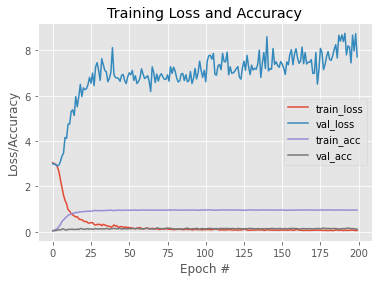

In [ ]:
# plot the training loss and accuracy
N = 200
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")